In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import os
from sklearn.metrics import f1_score

In [2]:
os.getcwd()

'/Users/danielmartinezdelarosa/Documents'

In [3]:
os.listdir(r'machine-learning/files')

['imgs', '__init__.py', '__pycache__', 'utils.py']

In [4]:
os.chdir(r'machine-learning/files')

In [5]:
import sys
sys.path.append(".../files")
import utils

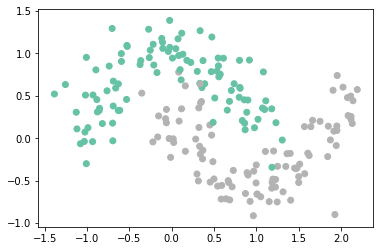

In [6]:
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise,
                            random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

In [8]:
model = Pipeline([
    ("poly", PolynomialFeatures(degree=30, include_bias=False)),
    ("regre_lin", LogisticRegression(penalty = 'none', max_iter=1e100))  
])

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
bagging_logreg=BaggingClassifier(model,n_estimators=100,
                                  bootstrap=True, max_samples=100, n_jobs=-1,
                                  oob_score=True, random_state=314)

In [16]:
model.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=30, include_bias=False,
                                    interaction_only=False, order='C')),
                ('regre_lin',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1e+100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [17]:
bagging_logreg.fit(X, y)

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('poly',
                                                  PolynomialFeatures(degree=30,
                                                                     include_bias=False,
                                                                     interaction_only=False,
                                                                     order='C')),
                                                 ('regre_lin',
                                                  LogisticRegression(C=1.0,
                                                                     class_weight=None,
                                                                     dual=False,
                                                                     fit_intercept=True,
                                                                     intercept_scaling=1,
                                                        

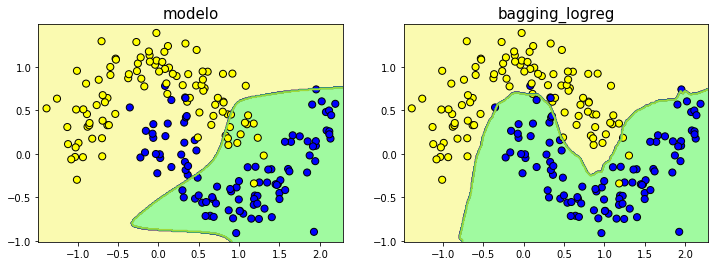

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title("modelo", fontsize=15)
ax[1].set_title("bagging_logreg", fontsize=15)
utils.plot_classf_model(X, y, model, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, bagging_logreg, ax=ax[1], contour=True)

In [19]:
y_hat_m = model.predict(X_test)
y_hat_blr = bagging_logreg.predict(X_test)

F1 de model = 0.7567567567567567
F1 de bagging_logreg = 0.9500000000000001


In [20]:
f1_score(y_test, y_hat_m)

0.7567567567567567

In [21]:
f1_score(y_test, y_hat_blr)

0.9500000000000001